# Hybrid Model Visualization

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Add src to path
sys.path.append(os.path.abspath(os.path.join("..", "src")))

from models.hybrid.hybrid_recommender import HybridRecommender

/Users/thanos/Desktop/PROJET AI FINALE/movie_recommendations/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Initialize Hybrid Recommender
Loading all three sub-models (Supervised, Clustering, Semantic).

In [2]:
recommender = HybridRecommender()

Initializing Hybrid Recommender...
Hybrid Recommender Initialized successfully.


## 2. Get Recommendations

In [3]:
reference_movie = "John Wick"
weights = {'similarity': 0.6, 'quality': 0.2, 'cluster': 0.2}

recs = recommender.recommend([reference_movie], top_n=10, weights=weights)

recs


Generatring Hybrid Recommendations for: ['John Wick']
--------------------------------------------------
1. Getting Semantic Candidates...

Finding recommendations for: John Wick
   - Found 46 from semantic model
2. Getting Clustering Candidates...
   - Found 50 from clustering model
3. Merging candidates. Total unique pool: 96
4. Calculating Quality Scores...


,names,year,final_score,sim_score_norm,quality_score_pred,cluster_score
35,John Wick: Chapter 2,2017,57.023457,72.777702,66.784176,0.000000
39,John Wick: Chapter 3 - Parabellum,2019,55.841938,70.492317,67.732741,0.000000
2274,Hitman,2007,54.350898,43.594765,63.885384,77.084810
6,John Wick: Chapter 4,2023,53.809414,65.542183,72.420520,0.000000
5206,Assassination,2015,51.190981,41.031849,73.157658,59.701699
6232,8MM,1999,47.865281,43.036289,63.017703,47.199833
6168,Traffik,2018,45.038003,55.425537,58.913405,0.000000
6378,Lansky,2021,43.193062,50.935440,63.158990,0.000000
8646,Hard Boiled,1992,42.905768,47.933418,70.728586,0.000000
8496,The Highwaymen,2019,41.720534,46.670597,68.590878,0.000000


## 3. Visualize Score Contribution (Bar Chart)

<Figure size 1200x600 with 0 Axes>

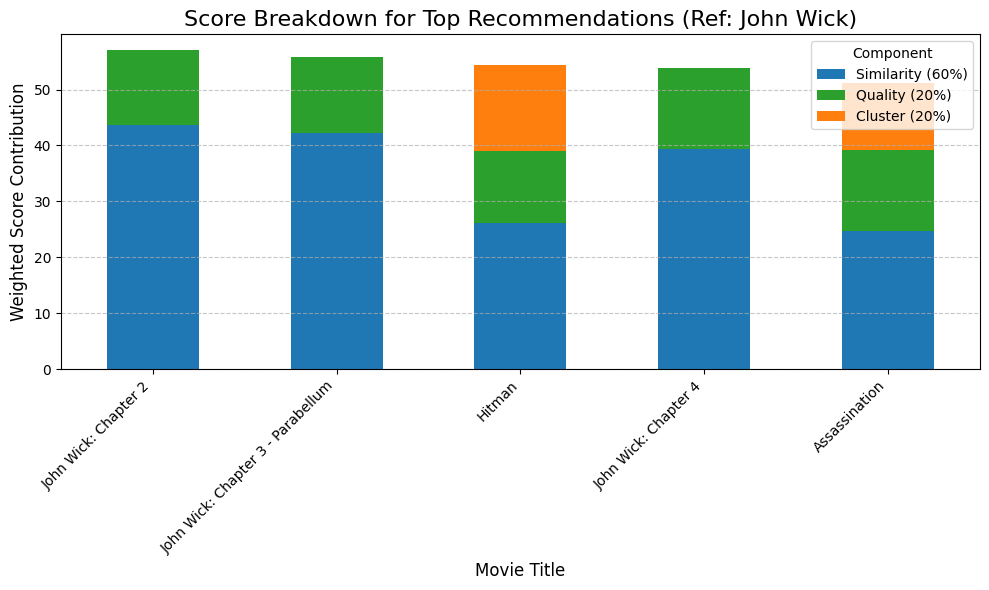

In [4]:
plot_df = recs.copy()
plot_df['Similarity (60%)'] = plot_df['sim_score_norm'] * weights['similarity']
plot_df['Quality (20%)'] = plot_df['quality_score_pred'] * weights['quality']
plot_df['Cluster (20%)'] = plot_df['cluster_score'] * weights['cluster']

top_5 = plot_df.head(5)

plt.figure(figsize=(12, 6))

components = ['Similarity (60%)', 'Quality (20%)', 'Cluster (20%)']
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']

ax = top_5[components].plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

plt.title(f'Score Breakdown for Top Recommendations (Ref: {reference_movie})', fontsize=16)
plt.xlabel('Movie Title', fontsize=12)
plt.ylabel('Weighted Score Contribution', fontsize=12)
plt.xticks(range(len(top_5)), top_5['names'], rotation=45, ha='right')
plt.legend(title='Component', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 4. Architecture Diagram

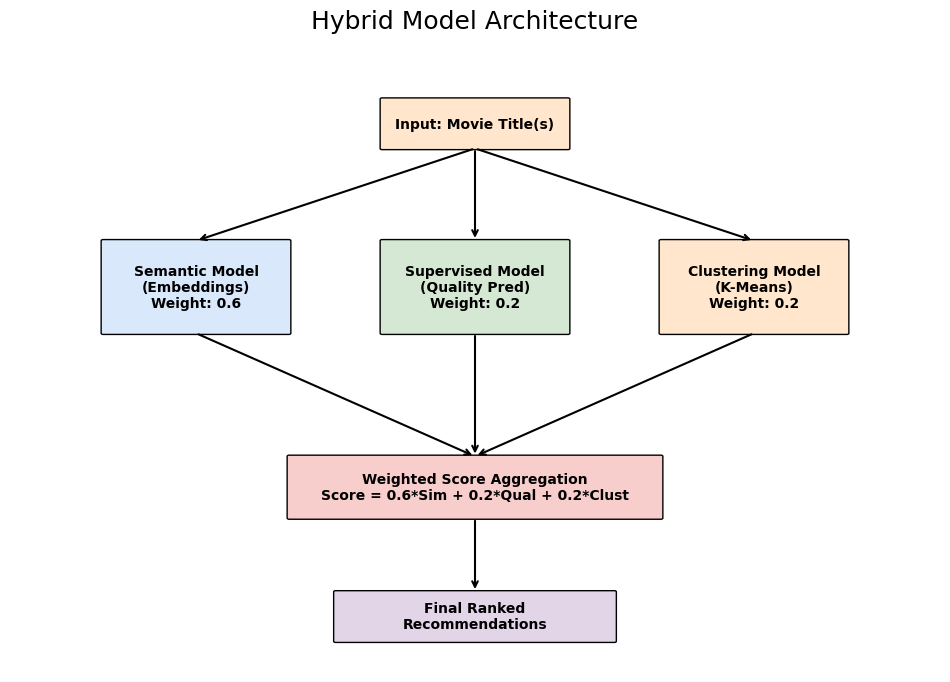

In [5]:
import matplotlib.patches as patches

def draw_architecture():
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.axis('off')

    def draw_box(x, y, w, h, text, color='#eff3ff', fontsize=10):
        rect = patches.FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.2", ec="black", fc=color)
        ax.add_patch(rect)
        ax.text(x + w/2, y + h/2, text, ha='center', va='center', fontsize=fontsize, fontweight='bold', wrap=True)
        return x + w/2, y, x + w/2, y + h

    def draw_arrow(x1, y1, x2, y2):
        ax.annotate("", xy=(x2, y2), xytext=(x1, y1),
                    arrowprops=dict(arrowstyle="->", lw=1.5))

    in_x, in_y_bot, in_x_top, in_y_top = draw_box(40, 85, 20, 8, "Input: Movie Title(s)", color='#ffe6cc')

    sem_x, sem_y_bot, sem_x_top, sem_y_top = draw_box(10, 55, 20, 15, "Semantic Model\n(Embeddings)\nWeight: 0.6", color='#dae8fc')
    qual_x, qual_y_bot, qual_x_top, qual_y_top = draw_box(40, 55, 20, 15, "Supervised Model\n(Quality Pred)\nWeight: 0.2", color='#d5e8d4')
    clus_x, clus_y_bot, clus_x_top, clus_y_top = draw_box(70, 55, 20, 15, "Clustering Model\n(K-Means)\nWeight: 0.2", color='#ffe6cc')

    draw_arrow(in_x, in_y_bot, sem_x_top, sem_y_top)
    draw_arrow(in_x, in_y_bot, qual_x_top, qual_y_top)
    draw_arrow(in_x, in_y_bot, clus_x_top, clus_y_top)

    agg_x, agg_y_bot, agg_x_top, agg_y_top = draw_box(30, 25, 40, 10, "Weighted Score Aggregation\nScore = 0.6*Sim + 0.2*Qual + 0.2*Clust", color='#f8cecc')

    draw_arrow(sem_x, sem_y_bot, agg_x_top, agg_y_top)
    draw_arrow(qual_x, qual_y_bot, agg_x_top, agg_y_top)
    draw_arrow(clus_x, clus_y_bot, agg_x_top, agg_y_top)

    out_x, out_y_bot, out_x_top, out_y_top = draw_box(35, 5, 30, 8, "Final Ranked\nRecommendations", color='#e1d5e7')
    draw_arrow(agg_x, agg_y_bot, out_x_top, out_y_top)

    plt.title("Hybrid Model Architecture", fontsize=18, pad=20)
    plt.show()

draw_architecture()